In [2]:
import os
import pandas as pd
import numpy as np

drivers_df = pd.read_csv('F1KaggleData/drivers.csv')
races_df = pd.read_csv('F1KaggleData/races.csv')
circuits_df = pd.read_csv('F1KaggleData/circuits.csv')
results_df = pd.read_csv('F1KaggleData/results.csv')

In [3]:
# display(drivers_df.head(5))
display(races_df.head(5))
# display(circuits_df.head(5))
display(results_df.head(5))

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [4]:
# races per season?
races_per_season = races_df.year.value_counts()
races_per_season.sort_index(inplace=True)
# display(type(races_per_season))
races_per_season.plot()

Now lets try to assess how many different drivers won per season, perhaps adjusted for the number of races 

In [13]:
import copy

wins = copy.copy(results_df.loc[results_df['position'] == 1.0])

wins.sort_values('raceId', inplace=True)
wins = pd.merge(wins, races_df[['raceId','year']])

wins.sort_values('year', inplace=True, ascending=True)
display(wins.head(5))

winners_per_year = wins.groupby(['year','driverId'])


display(type(winners_per_year))








,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year
841,20150,839,642,51,10.0,3,1.0,1,1,8.0,80,51:17.4,10277400.0,NaN,NaN,NaN,NaN,1,1950
840,20132,838,579,51,6.0,1,1.0,1,1,9.0,64,57:52.8,10672800.0,NaN,NaN,NaN,NaN,1,1950
839,20118,837,579,51,10.0,2,1.0,1,1,8.0,35,47:26.0,10046000.0,NaN,NaN,NaN,NaN,1,1950
838,20100,836,642,51,16.0,2,1.0,1,1,9.0,42,02:53.7,7373700.0,NaN,NaN,NaN,NaN,1,1950
837,20067,835,593,113,1.0,5,1.0,1,1,9.0,138,46:56.0,10015970.0,NaN,NaN,NaN,NaN,1,1950


pandas.core.groupby.generic.DataFrameGroupBy

In [47]:
# fuck this... I cannot get group by to work... lets write a function which abstracts away this difficulty for now 

import matplotlib.pyplot as plt

def get_winners_per_season(wins_df):
    
    seasons = wins_df['year'].unique()
    winners_per_dict = {}
    
    for season in seasons:
        # TODO: This looks ripe for a crack at some dictionary comprehension
        winners_for_season = wins_df.loc[wins_df['year'] == season]['driverId'].unique()
        winners_per_dict[season] = len(list(winners_for_season))

    plt.bar(winners_per_dict.keys(), winners_per_dict.values(), width=0.5, color='red')    
    

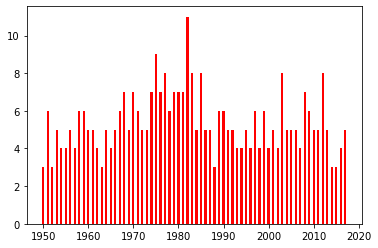

In [48]:
get_winners_per_season(wins)

